In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\sahithi aharam\Downloads\portfolio_data.csv')
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [4]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [5]:
df.isnull().any()

Date    False
AMZN    False
DPZ     False
BTC     False
NFLX    False
dtype: bool

In [6]:
df.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

## Data Vizualization

C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

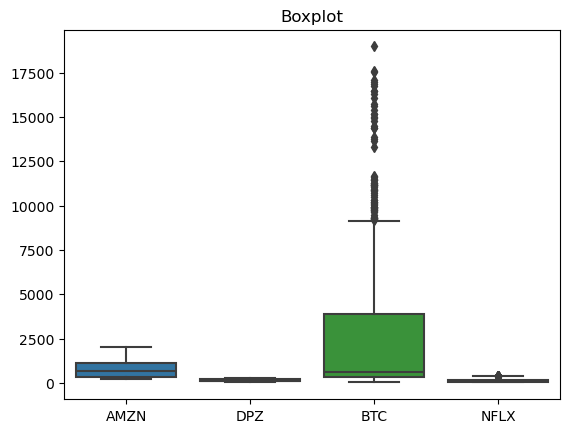

In [7]:
sn.boxplot(data=df)
plt.title("Boxplot")
plt.show()

C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

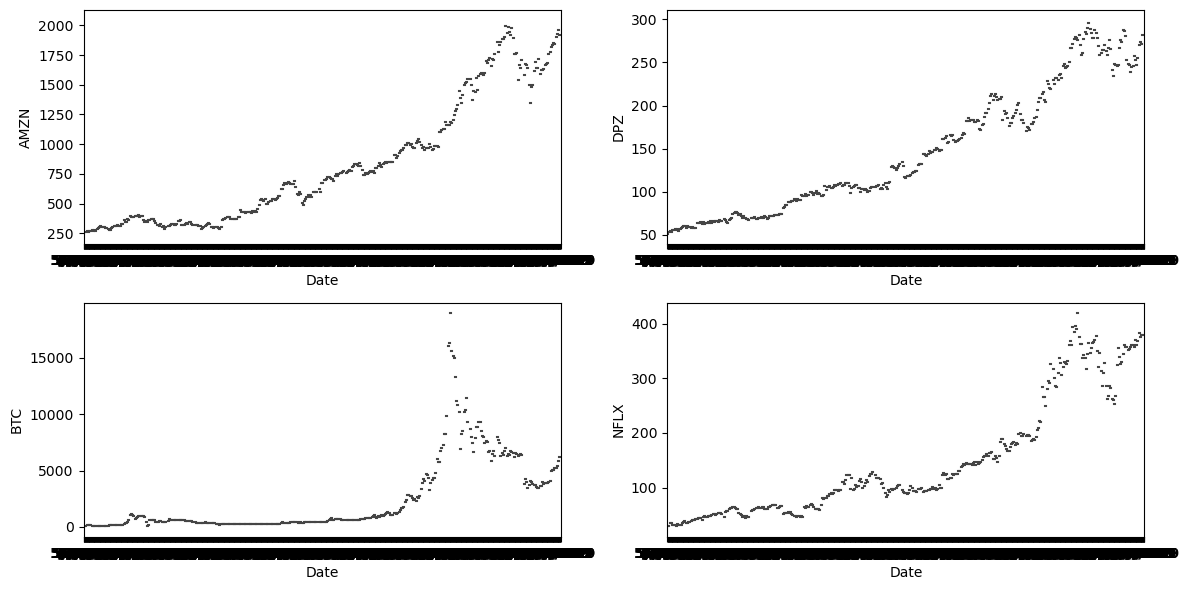

In [8]:
# Violin plot to visualize distribution and density by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sn.violinplot(x="Date", y="AMZN", data=df)
plt.subplot(2, 2, 2)
sn.violinplot(x="Date", y="DPZ", data=df)
plt.subplot(2, 2, 3)
sn.violinplot(x="Date", y="BTC", data=df)
plt.subplot(2, 2, 4)
sn.violinplot(x="Date", y="NFLX", data=df)
plt.tight_layout()

C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sahithi aharam\.conda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

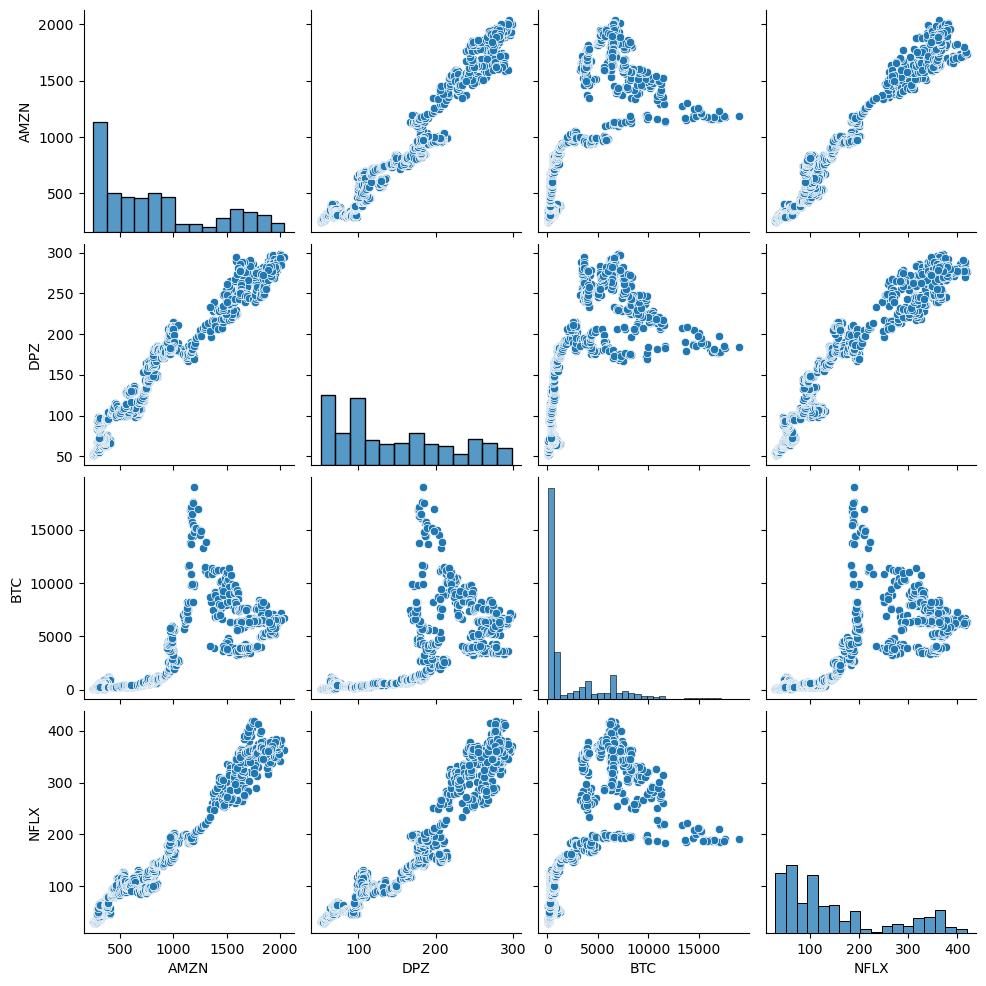

In [9]:
# Pairplot to visualize relationships between variables
sn.pairplot(df,markers=["o", "s", "D"])

## Model

In [10]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.8 ))

training_data_len

1216

In [11]:
# Scale the data
dataset = pd.read_csv(r'C:\Users\sahithi aharam\Downloads\portfolio_data.csv', index_col='Date')

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        , 0.        , 0.00193571, 0.00244266],
       [0.00241169, 0.00321824, 0.00150455, 0.00302215],
       [0.00548211, 0.00507347, 0.00228751, 0.00264071],
       ...,
       [0.91652336, 0.91809901, 0.37675649, 0.85127306],
       [0.87895251, 0.8999536 , 0.41848448, 0.81076018],
       [0.88868853, 0.89583139, 0.42926075, 0.81165869]])

In [12]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.        , 0.00241169, 0.00548211, 0.00418137, 0.00530348,
       0.00583382, 0.00666005, 0.00859721, 0.00908848, 0.01122102,
       0.01023291, 0.00887075, 0.01209749, 0.01083025, 0.0115169 ,
       0.00822317, 0.00757558, 0.00754209, 0.01064044, 0.0096579 ,
       0.01038363, 0.01170672, 0.01041155, 0.00975281, 0.01057345,
       0.01094189, 0.01598857, 0.01833326, 0.0148218 , 0.01308562,
       0.01538565, 0.01438077, 0.0166529 , 0.01871847, 0.01670873,
       0.01407374, 0.01402907, 0.01249385, 0.01332008, 0.01637935,
       0.01636818, 0.01644634, 0.01890827, 0.01981824, 0.01998571,
       0.02101849, 0.02364789, 0.02417266, 0.02461926, 0.02871132,
       0.03311598, 0.0325689 , 0.03273637, 0.0337524 , 0.03119556,
       0.03182083, 0.03084387, 0.02949288, 0.02830937, 0.0307992 ])]
[0.03560583130583625]

[array([0.        , 0.00241169, 0.00548211, 0.00418137, 0.00530348,
       0.00583382, 0.00666005, 0.00859721, 0.00908848, 0.01122102,
       0.01023291, 0.00887075, 0.01

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1156/1156 [==============================] - 75s 57ms/step - loss: 0.0011


In [15]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :].copy()

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 3s 42ms/step


0.25144959163335007

C:\Users\sahithi aharam\AppData\Local\Temp\ipykernel_6592\296249113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


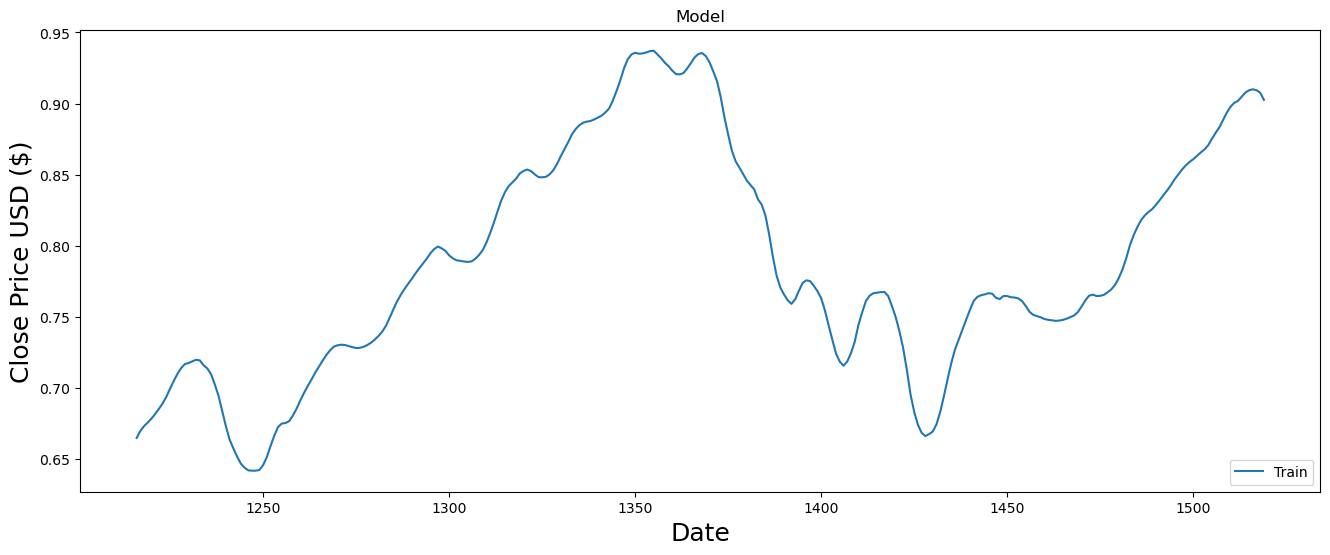

In [16]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
valid

,Predictions
1216,0.665031
1217,0.669987
1218,0.673394
1219,0.675942
1220,0.678725
...,...
1515,0.909375
1516,0.910071
1517,0.909425
1518,0.907678
